In [200]:
import os
import sys
import glob
from tqdm import tqdm

import numpy as np
import pandas as pd
import torch
import nibabel as nib
from nilearn.plotting import *
from nilearn import image

In [201]:
import imp

import data_processor
imp.reload(data_processor)
import utils.visualization_tools as visualization_tools
imp.reload(visualization_tools)
from utils.visualization_tools import *

## 0. Testing data loading for `Segmentation`

### 0.1 Dataset with FCD patients, data with `bb` segmented lesions - in `mask_path`.

In [202]:
pirogov_bb_data = data_processor.DataMriSegmentation(sample='pirogov', mask='bb', prefix='fcd', ignore_missing=True,
                         coord_min=(30,30,30, ), img_shape=(192, 192, 192, ),
                         mask_path='../../datasets/fcd_classification_bank/masks/bb',
                         image_path= '../../datasets/fcd_classification_bank',
                         targets_path= 'targets/targets_fcd_bank.csv')

print('\n')
print(f'Dataset size: {len(pirogov_bb_data)}')
print(f'Labels distribution: {np.unique(pirogov_bb_data.target, return_counts=True)}\n')

#Example of data 
img, seg = pirogov_bb_data[1]
print("Image shape: {}".format(img.shape))
print("Segmentation shape: {}".format(seg.shape))

  0%|          | 0/15 [00:00<?, ?it/s]

Assembling data for: pirogov sample.


100%|██████████| 15/15 [00:01<00:00, 10.14it/s]




Dataset size: 15
Labels distribution: (array([1]), array([15]))

Image shape: torch.Size([1, 192, 192, 192])
Segmentation shape: torch.Size([1, 192, 192, 192])


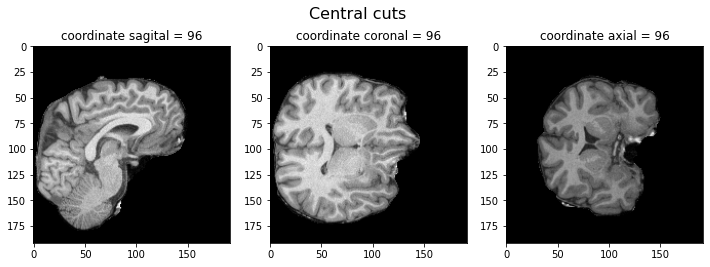

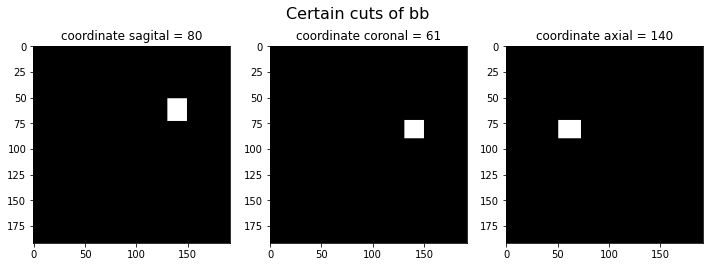

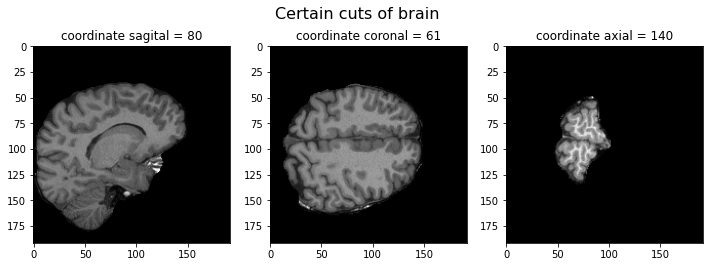

In [203]:
plot_central_cuts(img)
plot_certain_cuts(seg, get_center_coord_of_bb(seg), 'bb')
plot_certain_cuts(img, get_center_coord_of_bb(seg), 'brain')

### 0.2 Dataset with FCD patients with `mri positive` lesions, to be predicted

In [206]:
fcd_pirogov_seg_data = data_processor.DataMriSegmentation(sample='pirogov', prefix='fcd', mask='seg', ignore_missing=True,
                         coord_min=(30,30,30, ), img_shape=(192, 192, 192, ),
                         image_path= '../../datasets/fcd_classification_bank',
                         targets_path= 'targets/targets_fcd_bank.csv')

print('\n')
print(f'Dataset size: {len(fcd_pirogov_seg_data)}')
print(f'Labels distribution: {np.unique(fcd_pirogov_seg_data.target, return_counts=True)}\n')

#Example of data 
img, seg = fcd_pirogov_seg_data[1]
print("Image shape: {}".format(img.shape))
print("Segmentation shape: {}".format(seg.shape))

  7%|▋         | 1/15 [00:00<00:01,  9.69it/s]

Assembling data for: pirogov sample.


100%|██████████| 15/15 [00:01<00:00, 10.45it/s]




Dataset size: 15
Labels distribution: (array([1]), array([15]))

Image shape: torch.Size([1, 192, 192, 192])
Segmentation shape: torch.Size([1, 192, 192, 192])


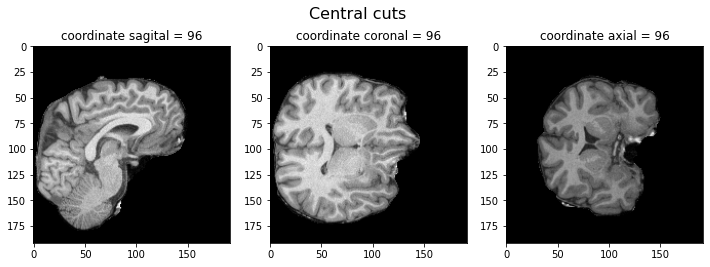

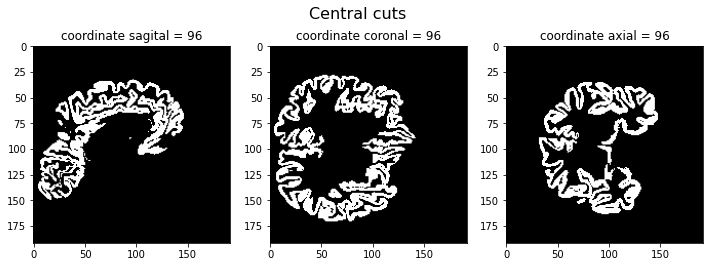

In [207]:
plot_central_cuts(img)
plot_central_cuts(seg)

### 0.3 Dataset with FCD patient with `mri negative` lesions, to be predicted.

In [204]:
no_fcd_pirogov_seg_data = data_processor.DataMriSegmentation(sample='pirogov', prefix='no_fcd', mask='seg', ignore_missing=True,
                         coord_min=(30,30,30, ), img_shape=(192, 192, 192, ),
                         image_path= '../../datasets/fcd_classification_bank',
                         targets_path= 'targets/targets_fcd_bank.csv')

print('\n')
print(f'Dataset size: {len(no_fcd_pirogov_seg_data)}')
print(f'Labels distribution: {np.unique(no_fcd_pirogov_seg_data.target, return_counts=True)}\n')

#Example of data 
img, seg = no_fcd_pirogov_seg_data[1]
print("Image shape: {}".format(img.shape))
print("Segmentation shape: {}".format(seg.shape))

  0%|          | 0/15 [00:00<?, ?it/s]

Assembling data for: pirogov sample.


100%|██████████| 15/15 [00:01<00:00, 10.43it/s]




Dataset size: 14
Labels distribution: (array([1]), array([14]))

Image shape: torch.Size([1, 192, 192, 192])
Segmentation shape: torch.Size([1, 192, 192, 192])


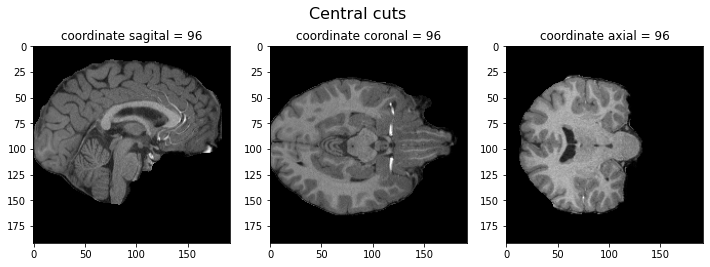

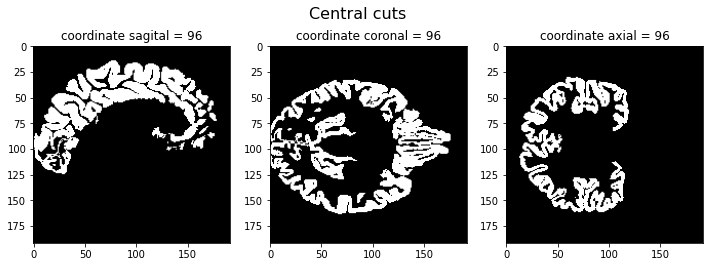

In [205]:
plot_central_cuts(img)
plot_central_cuts(seg)

### 0.4 Dataset with no FCD patients, yet with other psychoneurological patologies

In [208]:
la5_study_seg_data = data_processor.DataMriSegmentation(sample='la5_study', ignore_missing=True,
                         coord_min=(30,30,30, ), img_shape=(192, 192, 192, ),
                         image_path= '../../datasets/fcd_classification_bank',
                         targets_path= 'targets/targets_fcd_bank.csv')

print('\n')
print(f'Dataset size: {len(la5_study_seg_data)}')
print(f'Labels distribution: {np.unique(la5_study_seg_data.target, return_counts=True)}\n')

#Example of data 
img, seg = la5_study_seg_data[1]
print("Image shape: {}".format(img.shape))
print("Segmentation shape: {}".format(seg.shape))

  0%|          | 0/272 [00:00<?, ?it/s]

Assembling data for: la5_study sample.


100%|██████████| 272/272 [00:16<00:00, 16.61it/s]




Dataset size: 265
Labels distribution: (array([0]), array([265]))

Image shape: torch.Size([1, 192, 192, 192])
Segmentation shape: torch.Size([1, 192, 192, 192])


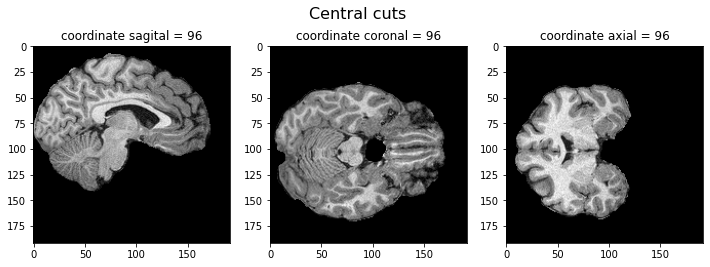

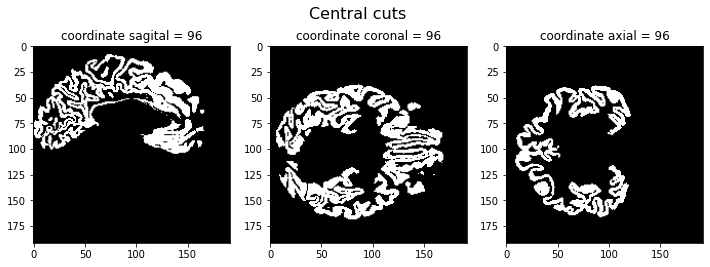

In [209]:
plot_central_cuts(img)
plot_central_cuts(seg)

### 0.5 Dataset with both `control` and `focal epilepsy` patients

In [210]:
soloviev_seg_data = data_processor.DataMriSegmentation(sample='soloviev', ignore_missing=True,
                         coord_min=(30,30,30, ), img_shape=(192, 192, 192, ),
                         image_path= '../../datasets/fcd_classification_bank',
                         targets_path= 'targets/targets_fcd_bank.csv')

print('\n')
print(f'Dataset size: {len(soloviev_seg_data)}')
print(f'Labels distribution: {np.unique(soloviev_seg_data.target, return_counts=True)}\n')

#Example of data 
img, seg = soloviev_seg_data[1]
print("Image shape: {}".format(img.shape))
print("Segmentation shape: {}".format(seg.shape))

  1%|          | 2/181 [00:00<00:12, 13.98it/s]

Assembling data for: soloviev sample.


100%|██████████| 181/181 [00:11<00:00, 15.17it/s]




Dataset size: 180
Labels distribution: (array([0, 1]), array([90, 90]))

Image shape: torch.Size([1, 192, 192, 192])
Segmentation shape: torch.Size([1, 192, 192, 192])


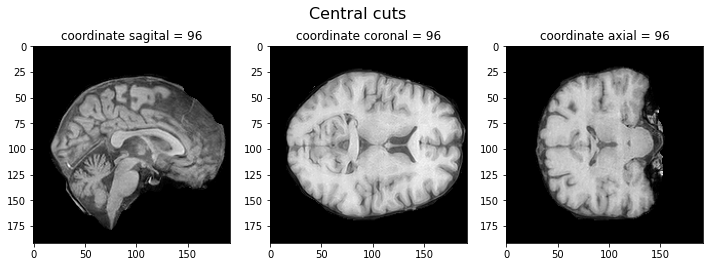

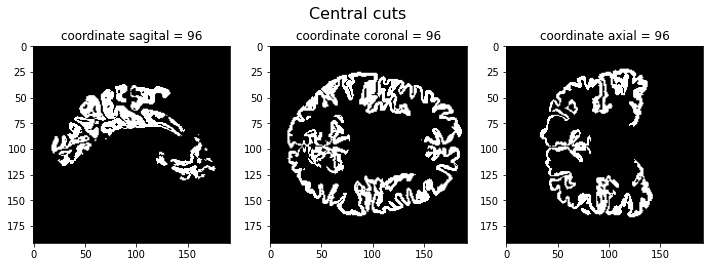

In [211]:
plot_central_cuts(img)
plot_central_cuts(seg)

In [212]:
kulakov_seg_data = data_processor.DataMriSegmentation(sample='kulakov', ignore_missing=True,
                         coord_min=(30,30,30, ), img_shape=(192, 192, 192, ),
                         image_path= '../../datasets/fcd_classification_bank',
                         targets_path= 'targets/targets_fcd_bank.csv')

print('\n')
print(f'Dataset size: {len(kulakov_seg_data)}')
print(f'Labels distribution: {np.unique(kulakov_seg_data.target, return_counts=True)}\n')

#Example of data 
img, seg = kulakov_seg_data[1]
print("Image shape: {}".format(img.shape))
print("Segmentation shape: {}".format(seg.shape))

  0%|          | 2/480 [00:00<00:34, 13.88it/s]

Assembling data for: kulakov sample.


100%|██████████| 480/480 [00:29<00:00, 16.16it/s]




Dataset size: 419
Labels distribution: (array([1]), array([419]))

Image shape: torch.Size([1, 192, 192, 192])
Segmentation shape: torch.Size([1, 192, 192, 192])


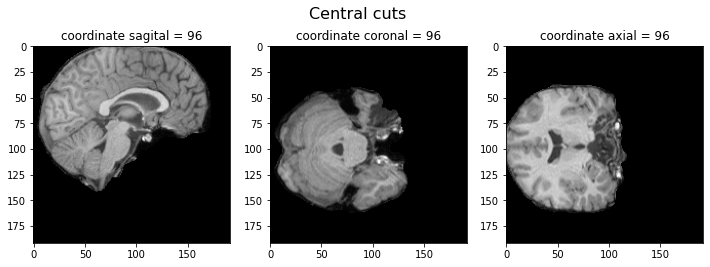

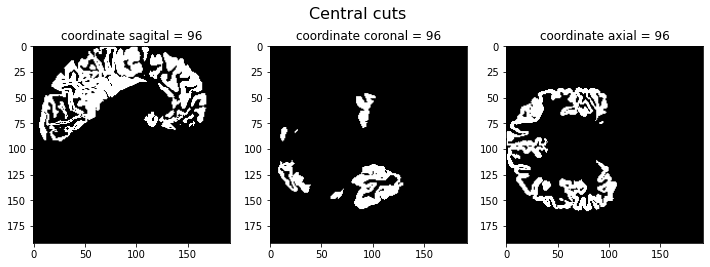

In [213]:
plot_central_cuts(img)
plot_central_cuts(seg)